# Predição de valores de Imóveis

Autora: Luana Fraga de Andrade Araujo

E-mail: luafraga1@hotmail.com

LinkedIn: www.linkedin.com/in/luana-fraga-63a794193/

Github: https://github.com/luanafraga

# Objetivo do projeto

O objetivo deste projeto é a **predição de valores dos imóveis** da cidade de São Paulo a partir de dados como metragem do imóvel, quantidade de quartos, banheiros e vagas de garagem.

# Base de dados

A base de dados possui informações sobre:

   - **Rua**
   - **Bairro**
   - **Cidade**
   - **Metragem**
   - **Quartos**
   - **Banheiros**
   - **Vagas de garagem**
   - **Valor do imóvel**


# Importação de Pacotes

In [1]:
import pandas as pd
import numpy as np

# para visualização dos gráficos
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# para criação e validação dos modelos de machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb


# para garantir a replicabilidade do código
seed = 54

In [3]:
sns.set_palette('pastel')
sns.set_style('white')

# Leitura dos dados

In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)

In [5]:
dados = pd.read_csv('dados_imoveis.csv')
dados

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


In [6]:
print(f'Nosso primeiro Conjunto de Dados tem {dados.shape[0]} linhas e {dados.shape[1]} colunas.')

Nosso primeiro Conjunto de Dados tem 10008 linhas e 8 colunas.


# Informações do DataFrame

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


O DataFrame consta com **7 variáveis**. 

Podemos notar que a variável **Valor** está como 'object'. Precisaremos transformar em uma variável numérica.

Há **valores nulos** nas colunas **Rua e Bairro**. Faremos uma investigação posteriormente.

In [8]:
dados.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


In [9]:
dados.describe(include=[object])

,Rua,Bairro,Cidade,Valor
count,6574,9996,10008,10008
unique,3130,701,1,1041
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,R$ 2.500.000
freq,24,409,10008,182


Para começar a análise, vamos utilizar o método **.describe()** para entender alguns métodos estatísticos que temos dentro da base de dados. O método describe() fornece as informações sobre:

- Para variáveis **quantitativas**:

   - **count** - Conta a quantidade de número de valores não vazios. Com esses valores podemos entender melhor o tamanho da amostra.

   - **mean** - O valor médio, em média aritmética. 

   - **std** - O desvio padrão. É a medida de como os dados se dispersam em relação à média, ou seja, o quanto eles estão espalhados.

   - **min e max** - Valores que auxiliam a identificar a amplitude da amostra, entre o valor mínimo e máximo.

   - **quartis** - Valores que nos mostram de que forma os dados foram distribuídos, por exemplo em 50% é a mediana e metade dos valores são inferiores a X valor, a outra metade é superior àquele valor.


- Para variáveis **categóricas**:

    - **unique** é a quantidade de valores únicos

    - **top** é o valor mais comum

    - **freq** é a frequência do valor mais comum

# Análise exploratória

## Excluindo valores nulos e a coluna 'Rua'

In [10]:
dados.drop(['Rua'], axis=1, inplace=True)

In [11]:
dados.dropna(inplace=True)

In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 10007
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Bairro     9996 non-null   object
 1   Cidade     9996 non-null   object
 2   Metragem   9996 non-null   int64 
 3   Quartos    9996 non-null   int64 
 4   Banheiros  9996 non-null   int64 
 5   Vagas      9996 non-null   int64 
 6   Valor      9996 non-null   object
dtypes: int64(4), object(3)
memory usage: 624.8+ KB


## Transformando o tipo da variável Valor de categórica para numérica

### Dividindo a coluna 'Valor' em 3 colunas para podermos extrair somente o valor numérico

In [13]:
dados['Valor'].str.split(expand=True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [14]:
dados['Valor'].str.split(expand=True)[0].unique()

array(['R$'], dtype=object)

In [15]:
dados['Valor'].str.split(expand=True)[1].unique()

array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
       '2.200'], dtype=object)

In [16]:
len(dados['Valor'].str.split(expand=True)[1].unique())

1036

In [17]:
dados['Valor'].str.split(expand=True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [18]:
dados[['Moeda', 'Valor_anuncio', 'Tipo_anuncio']] = dados['Valor'].str.split(expand=True)
dados

,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...
10003,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None
10006,Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês,R$,2.200,/Mês


In [19]:
dados[dados['Tipo_anuncio'].isnull()]['Tipo_anuncio'].unique()

array([None], dtype=object)

Conseguimos verificar que na coluna 'Valor' há opções '/Mês', '/Ano', '/Dia, o que indica que nesta base dados há tambem imóveis para aluguel. Iremos fazer um novo dataframe somente com imóveis que estão disponíveis para venda.

In [20]:
dados_vendas = dados[dados['Tipo_anuncio'].isnull()]
dados_vendas

,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...
10002,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [21]:
dados_vendas.drop(['Tipo_anuncio'], axis=1, inplace=True)

/var/folders/wq/v6b_q61j6zqc33gpbvj9jb000000gn/T/ipykernel_35828/1622281258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas.drop(['Tipo_anuncio'], axis=1, inplace=True)


In [22]:
dados_vendas['Valor_anuncio'] = dados_vendas['Valor_anuncio'].str.replace('.', '').astype(float)

/var/folders/wq/v6b_q61j6zqc33gpbvj9jb000000gn/T/ipykernel_35828/3539278392.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas['Valor_anuncio'] = dados_vendas['Valor_anuncio'].str.replace('.', '').astype(float)
/var/folders/wq/v6b_q61j6zqc33gpbvj9jb000000gn/T/ipykernel_35828/3539278392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas['Valor_anuncio'] = dados_vendas['Valor_anuncio'].str.replace('.', '').astype(float)


In [23]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 0 to 10007
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bairro         9146 non-null   object 
 1   Cidade         9146 non-null   object 
 2   Metragem       9146 non-null   int64  
 3   Quartos        9146 non-null   int64  
 4   Banheiros      9146 non-null   int64  
 5   Vagas          9146 non-null   int64  
 6   Valor          9146 non-null   object 
 7   Moeda          9146 non-null   object 
 8   Valor_anuncio  9146 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 714.5+ KB


Tipo da variável **Valor_anuncio** dos imóveis à venda ja transformados para **float**, para que possamos fazer operações com estes dados.

In [24]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio
count,9146.00,9146.00,9146.00,9146.00,9146.00
mean,434.25,3.45,3.79,3.96,3050596.46
std,7860.71,1.05,1.97,2.60,3945437.70
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,275.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [25]:
dados_vendas.describe(include=[object])

,Bairro,Cidade,Valor,Moeda
count,9146,9146,9146,9146
unique,697,1,938,1
top,Alto de Pinheiros,São Paulo,R$ 2.500.000,R$
freq,369,9146,182,9146


## Análise da quantidade de imóveis por valor de venda

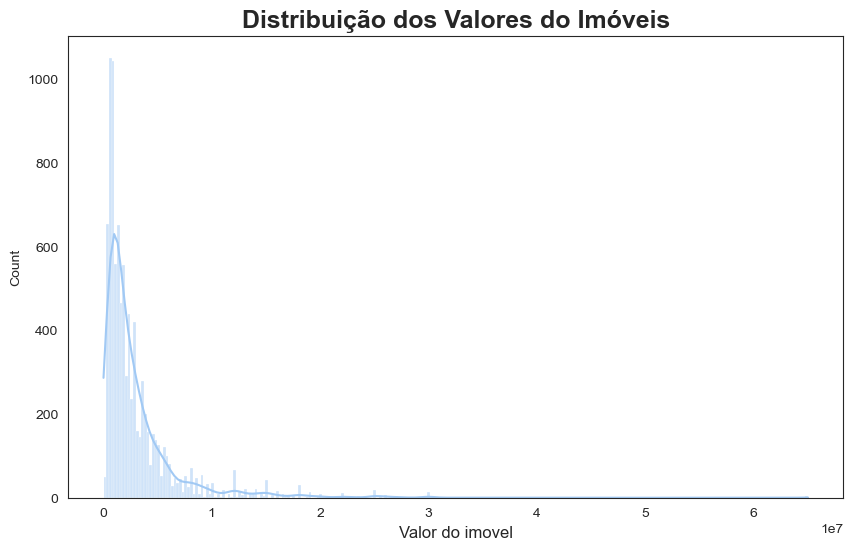

In [26]:
plt.figure(figsize=(10,6))
fig=sns.histplot(dados_vendas['Valor_anuncio'], kde=True)
fig.set_title('Distribuição dos Valores do Imóveis', fontsize=18, weight='bold')
fig.set_xlabel('Valor do imovel', fontsize=12)
plt.show()

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


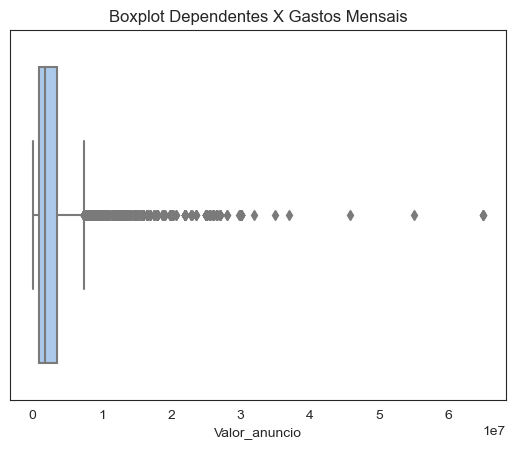

In [27]:
sns.boxplot('Valor_anuncio', data=dados_vendas)
plt.title('Boxplot Dependentes X Gastos Mensais')
plt.show()

Verificamos que há uma **maior densidade de imóveis** até o valor de **R$1.000.000,00**. Faremos um outro gráfico para visualizar melhor a distribuição dos imoveis até este valor.

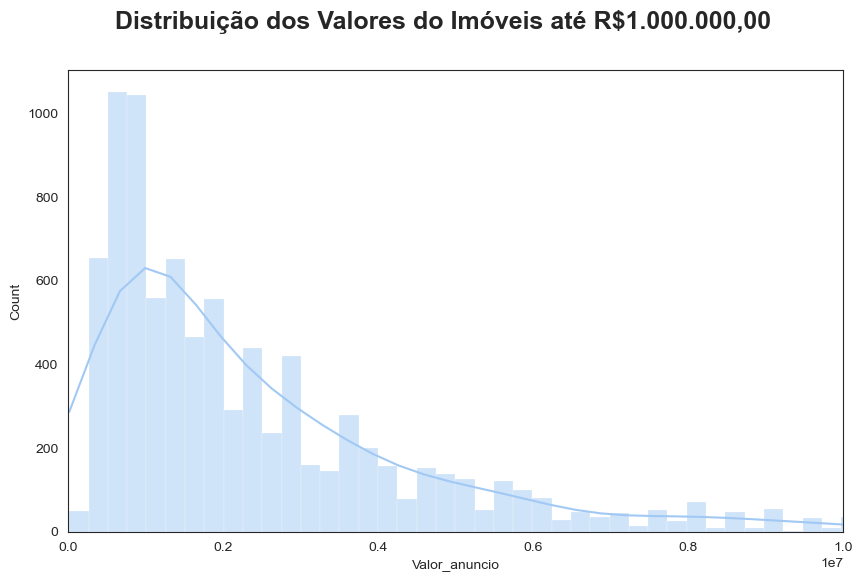

In [28]:
fig = plt.figure(figsize=(10,6))
sns.histplot(dados_vendas['Valor_anuncio'], kde=True)
plt.xlim(0, 10000000)
fig.suptitle('Distribuição dos Valores do Imóveis até R$1.000.000,00', fontsize=18, weight='bold')
plt.show()

## Verificando valor por m2 dos imóveis

In [29]:
dados_vendas['Valor_m2'] = dados_vendas['Valor_anuncio'] / dados_vendas['Metragem']
dados_vendas

/var/folders/wq/v6b_q61j6zqc33gpbvj9jb000000gn/T/ipykernel_35828/739571977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas['Valor_m2'] = dados_vendas['Valor_anuncio'] / dados_vendas['Metragem']


,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Valor_m2
0,Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,7000.00
1,Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,7459.68
2,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,3040.00
3,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,2209.68
4,Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,5400.00
...,...,...,...,...,...,...,...,...,...,...
10002,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.00,5617.98
10003,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.00,7000.00
10004,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.00,3801.65
10005,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.00,5121.95


In [30]:
dados_vendas.groupby('Bairro').mean()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2
Bairro,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,7656.17
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,5849.57
Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,7606.73
Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,5691.74
Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,11269.98
...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,4467.13
Água Branca,173.58,3.08,3.25,2.25,1226500.00,7269.11
Água Fria,165.42,2.83,3.42,2.50,927083.33,5841.10


In [31]:
dados_bairro = dados_vendas.groupby('Bairro').sum()
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2
Bairro,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55
Alto da Lapa,23940,252,308,320,166653500.00,608538.25
Alto da Mooca,5401,66,52,73,23683400.00,113834.80
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61
...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64
Água Branca,2083,37,39,27,14718000.00,87229.37
Água Fria,1985,34,41,30,11125000.00,70093.25


In [32]:
dados_bairro['Valor_m2_bairro'] = dados_bairro['Valor_anuncio'] / dados_bairro['Metragem']
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2,Valor_m2_bairro
Bairro,,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53


In [33]:
dados_vendas.groupby("Bairro").mean().loc["Vila Mariana"]

Metragem            231.24
Quartos               3.39
Banheiros             3.24
Vagas                 2.95
Valor_anuncio   1771159.76
Valor_m2           7913.15
Name: Vila Mariana, dtype: float64

In [34]:
dados_bairro.loc["Vila Mariana"]

Metragem              39079.00
Quartos                 573.00
Banheiros               547.00
Vagas                   499.00
Valor_anuncio     299326000.00
Valor_m2            1337323.16
Valor_m2_bairro        7659.51
Name: Vila Mariana, dtype: float64

Foram realizadas duas formas de calcular o valor por m2 dos imóveis.

A primeira, dividindo o valor de cada imóvel pela sua área. E a segunda, somando a o valor de todos os imóveis e dividindo pela soma da área. 

Podemos verificar, por este exemplo acima, que o valor médio por m2 do Bairro Vila Mariana, utilizando a primeira forma, é de 7.913/m2 e, utilizando a segunda, R$7.659/m2. Importante discutir estes conceitos com a área responsável.

## Verificando os bairros com maior quantidade de imóveis disponíveis para venda

In [35]:
top_bairros = dados_vendas["Bairro"].value_counts()[:10]
top_bairros

Alto de Pinheiros    369
Jardim Guedala       353
Jardim Paulista      266
Brooklin Paulista    224
Jardim Europa        210
Pacaembu             200
Vila Madalena        198
Cidade Jardim        191
Planalto Paulista    184
Jardim Leonor        170
Name: Bairro, dtype: int64

<AxesSubplot:>

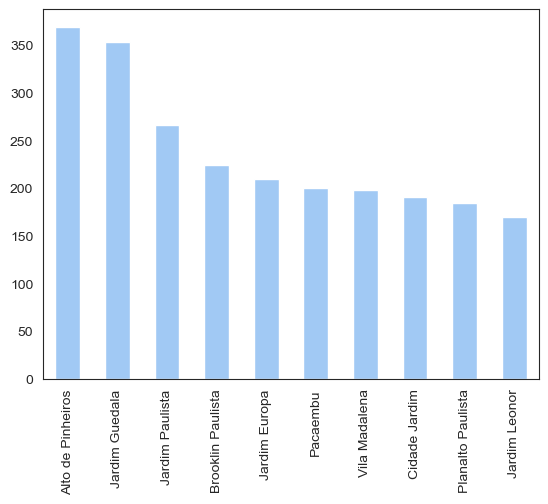

In [36]:
top_bairros.plot.bar()

Os bairros com **maior quantidade de imóveis** à venda são: Alto de Pinheiros, Jardim Guedala e Jardim Paulista.

In [37]:
top_bairros = dados_vendas["Bairro"].value_counts()[:10].index
top_bairros

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor'],
      dtype='object')

In [38]:
dados_bairro.reset_index(inplace = True)
dados_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2,Valor_m2_bairro
0,Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
693,Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
694,Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53
695,Água Funda,278,6,5,4,1090000.00,7753.73,3920.86


In [39]:
top = dados_bairro.query("Bairro in @top_bairros")
top

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2,Valor_m2_bairro
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
19,Brooklin Paulista,70002,778,862,832,475796789.00,1627341.87,6796.90
57,Cidade Jardim,132220,789,1008,1172,1164210900.00,1635692.98,8805.10
155,Jardim Europa,118898,795,993,1056,2414172900.00,4192164.45,20304.57
168,Jardim Guedala,972212,1443,2027,2161,1801165587.00,2833882.79,1852.65
187,Jardim Leonor,97141,697,941,902,646326369.00,1115858.80,6653.49
227,Jardim Paulista,130283,1028,1231,1171,2136081000.00,4279262.19,16395.70
338,Pacaembu,100285,774,889,1028,867956500.00,1753672.28,8654.90
396,Planalto Paulista,59250,636,768,713,374907000.00,1186380.95,6327.54
564,Vila Madalena,66250,739,786,712,583253030.00,1792770.40,8803.82


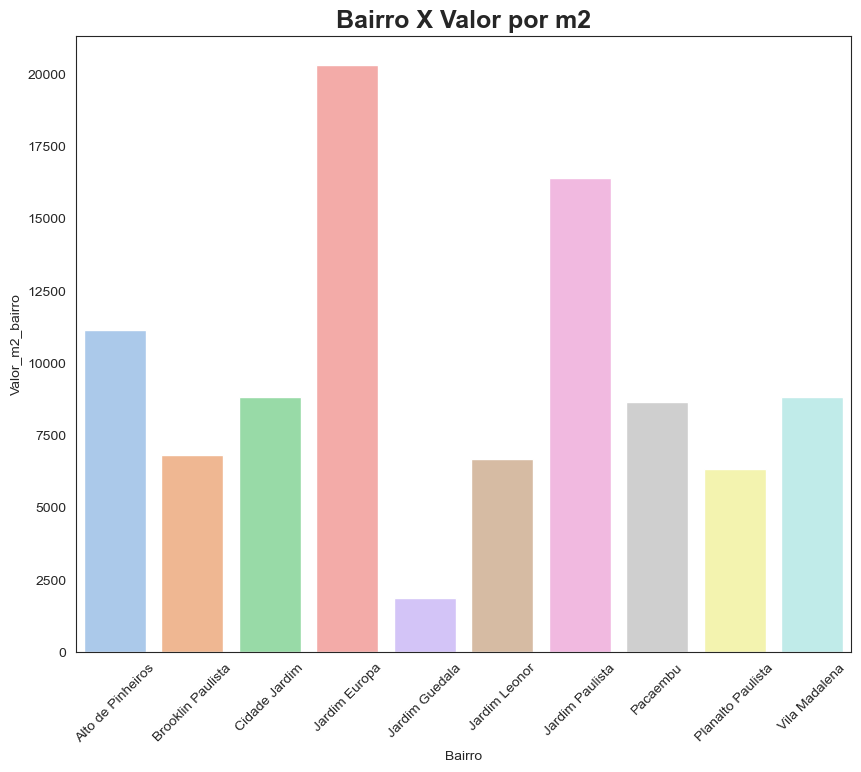

In [40]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Bairro", y="Valor_m2_bairro", data=top)
plt.title('Bairro X Valor por m2', fontsize=18, weight='bold')
ax.tick_params(axis='x', rotation=45)

Verificamos que dos bairros com mais imóveis anunciados, os que possuem um maior valor por m2 é o Jardim Europa (média de 20.000,00/m2) seguido do Jardim Paulista (média de 16.000,00/m2) e Alto de Pinheiros (média de 11.000,00/m2). 

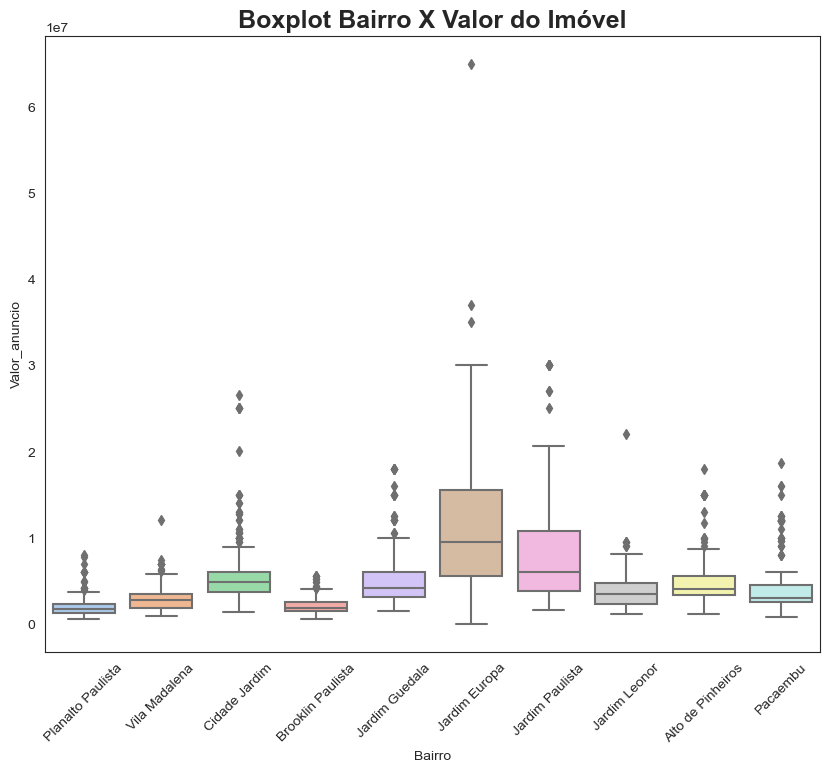

In [41]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros"), x="Bairro", y="Valor_anuncio")
plt.title('Boxplot Bairro X Valor do Imóvel', fontsize=18, weight='bold')
ax.tick_params(axis='x', rotation=45)
plt.show()

Verificamos que dos bairros com mais imóveis anunciados, os que possuem um maior valor total é o Jardim Europa seguido do Jardim Paulista. Podemos ver também que o imóvel mais caro em SP anunciado, no valor de 65.000.000,00, fica localizado no bairro Jardim Europa

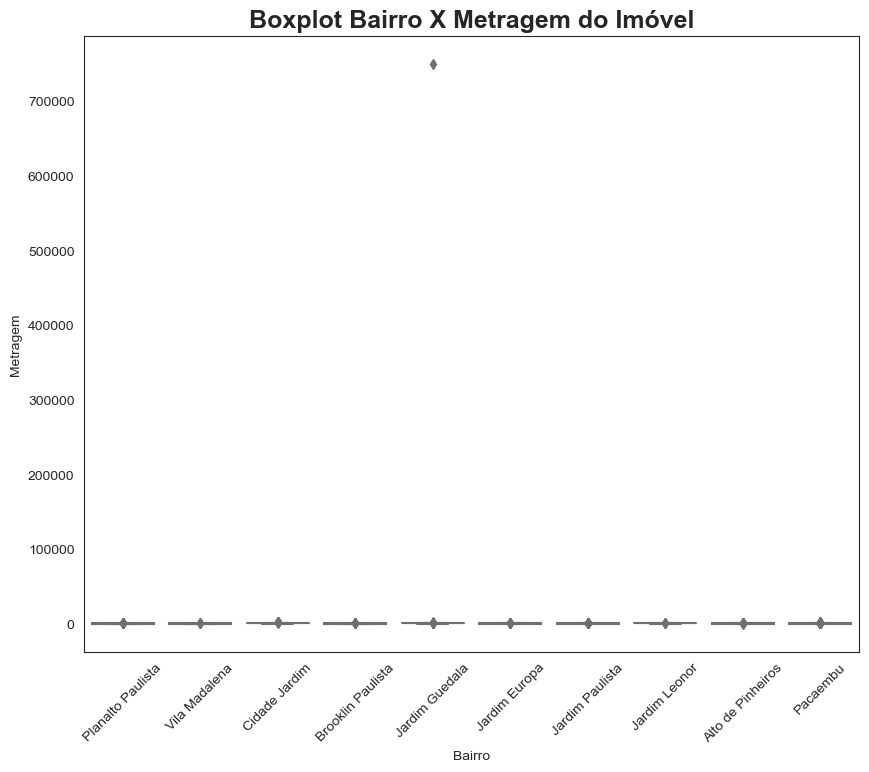

In [42]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros"), x="Bairro", y="Metragem")
plt.title('Boxplot Bairro X Metragem do Imóvel', fontsize=18, weight='bold')
ax.tick_params(axis='x', rotation=45)
plt.show()

Quando plotamos o boxplot Bairro X Metragem do Imóvel, verificamos um outlier com 700.000 m2 no bairro Jardim Guedala. Considerando que houve um erro de digitação, iremos plotar somente os imóveis com metragem abaixo de 2000 m2, para podermos visualizar melhor os dados.

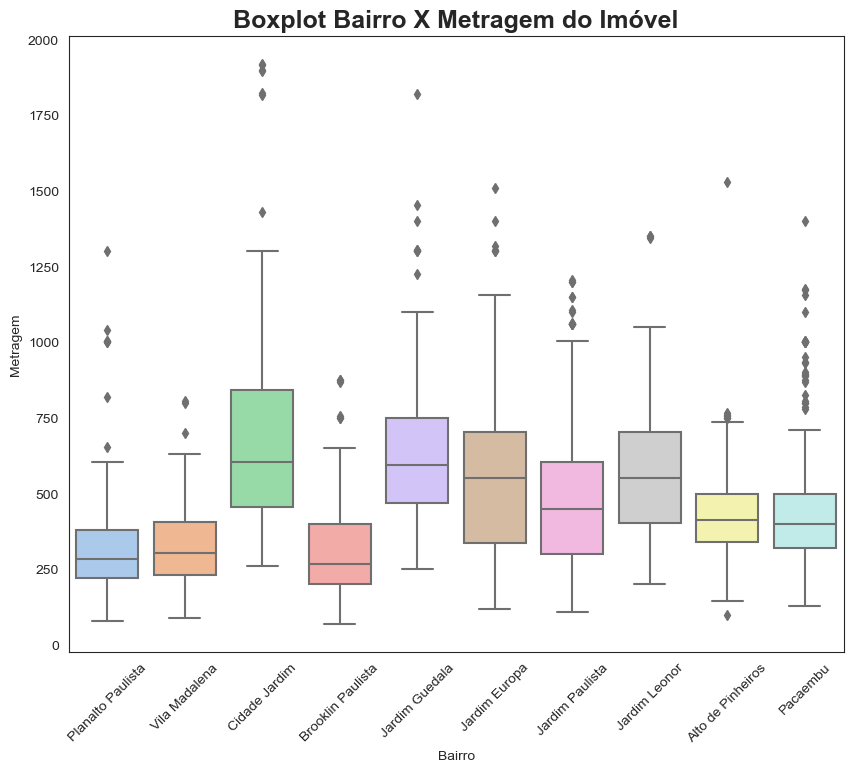

In [43]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros & Metragem < 2000"), x="Bairro", y="Metragem")
plt.title('Boxplot Bairro X Metragem do Imóvel', fontsize=18, weight='bold')
ax.tick_params(axis='x', rotation=45)
plt.show()

Verificamos que dos bairros com mais imóveis anunciados, o bairro que possui imóveis com maiores metragens é o bairro Cidade Jardim, com mediana de aproximadamente 600m2.

### Dos bairros com maior quantidade de imóveis disponíveis para venda:
- Os bairros que possuem um maior valor por m2 é o Jardim Europa (média de 20.000,00/m2) seguido do Jardim Paulista (média de 16.000,00/m2) e Alto de Pinheiros (média de 11.000,00/m2). O bairro que possui menor valor/m2 é o Jardim Guedala com média de 2.000,00 por m2;
- Os bairros que possuem um maior valor total é o Jardim Europa seguido do Jardim Paulista. Podemos ver também que o imóvel mais caro em SP anunciado, no valor de 65.000.000,00, fica localizado no bairro Jardim Europa;
- O bairro que possui imóveis com maiores metragens é o bairro Cidade Jardim, com área mediana de aproximadamente 600m2.

# Removendo outliers

Removeremos outliers do nosso dataset:

    - Imóveis com: valor acima de R$30.000.000, valor abaixo de R$100.000 e metragem acima de 2000m2.

In [44]:
dados_vendas.drop(dados_vendas.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000 | Metragem > 2000").index, inplace = True)

/var/folders/wq/v6b_q61j6zqc33gpbvj9jb000000gn/T/ipykernel_35828/2529105906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas.drop(dados_vendas.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000 | Metragem > 2000").index, inplace = True)


# Matriz de Correlação

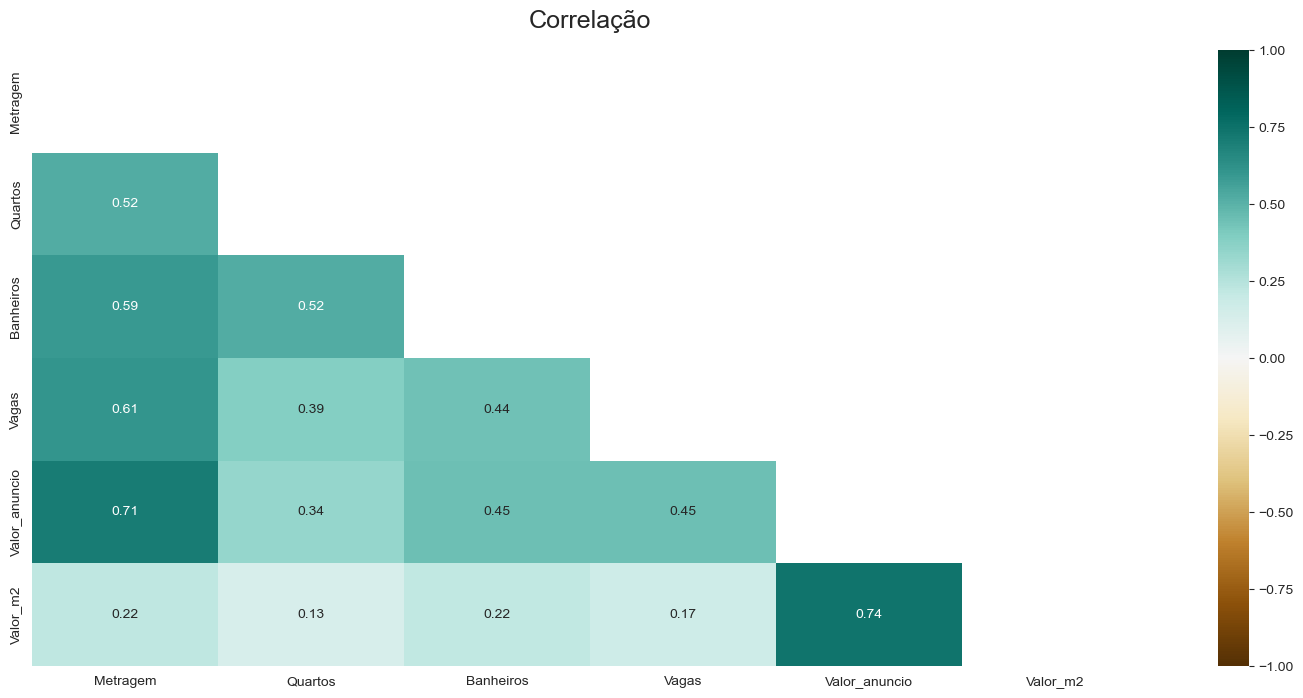

In [45]:
plt.figure(figsize=(18, 8))
mask = np.triu(np.ones_like(dados_vendas.corr(), dtype=bool))
heatmap = sns.heatmap(dados_vendas.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

 A matriz de correlação nos fornece hipóteses que permite identificar quais são as variáveis que influenciam positiva ou negativamente na identificação de uma classe da variável alvo. 
 
 Podemos verificar que a variável **Valor_anuncio** tem correlação:

Muito **Positiva** com a variável **Valor_m2** (Iremos excluir esta variável, pois a correlação muito alta pode atrapalhar nosso modelo)


    
**Positiva** com as variáveis **Metragem, Banheiro, Vagas e Quartos** 
  

# Machine Learning

## Definindo as features (dados de entrada) e os labels (dados de saída)

In [46]:
X = dados_vendas[['Metragem', 'Quartos', 'Banheiros', 'Vagas']]
Y = dados_vendas["Valor_anuncio"]

## Criação de bases de treino e teste

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = seed)

## Regressão Linear

In [48]:
#criando o modelo
lr = LinearRegression()

#treinando o modelo
lr.fit(X_train, Y_train)

#criando previsões de teste
Y_predict_lr = lr.predict(X_test)

## Random Forest Regressor

In [49]:
#criando o modelo
rf = RandomForestRegressor(random_state = seed)

#treinando o modelo
rf.fit(X_train, Y_train)

#criando previsões de teste
Y_predict_rf = rf.predict(X_test)

## Random Forest Regressor com validação cruzada e Grid Search

Essa técnica consiste em definir um conjunto de valores que determinado hiperparâmetro pode ter e treinar um modelo para cada combinação desses hiperparâmetros, e então selecionar a combinação com o melhor resultado.

In [50]:
# definindo os valores possíveis dos parâmetros a serem testados
params = {'n_estimators': [50, 100],
          'max_features': [2, 3, 4],
          'max_depth': [2, 5, 10],
          'min_samples_split': [2, 4],}

# criando o objeto do modelo com RandomForestRegressor
rf_model_cv_gs = RandomForestRegressor(random_state = seed)

# criando o objeto do grid search com GridSearchCV
grid_search = GridSearchCV(rf_model_cv_gs, param_grid=params, return_train_score=True) # valor padrão para quebras é 3

# treinando o modelo com o grid search
grid_search.fit(X_train, Y_train)

# imprimindo a melhor combinação de hiperparâmetros
print('\n Best hyperparameters:')
print(grid_search.best_params_)

# configurando o modelo com a melhor combinação de hiperparâmetros
rf_model_cv_gs.set_params(n_estimators = grid_search.best_params_['n_estimators'],
                           max_features = grid_search.best_params_['max_features'],
                           max_depth = grid_search.best_params_['max_depth'],
                           min_samples_split = grid_search.best_params_['min_samples_split'])

# treinando um modelo com a melhor combinação de hiperparâmetros
rf_model_cv_gs.fit(X_train, Y_train)

# prevendo com o modelo 
y_pred_rf_gs = rf_model_cv_gs.predict(X_test)



 Best hyperparameters:
{'max_depth': 10, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50}


Podemos ver que usando o **Grid Search** os melhores parâmetros selecionados foram max_depth de 10, max_features de 2 e um número de estimadores de 50.

### LightGBM

A principal diferença entre o Light GBM e a maioria dos outros métodos é que ele cria suas árvores verticalmente, enquanto outros algoritmos as criam horizontalmente. Em outras palavras, o Light GBM cresce suas árvores por folha, enquanto os demais crescem suas árvores por níveis. Assim, ele decide a quebra a ser feita na árvore pela folha que terá o maior ganho de informação.

In [51]:
# criando o objeto do modelo com LGBMRegressor
lgb_model_1 = lgb.LGBMRegressor(random_state = seed)

# treinando o modelo com os dados de treino
lgb_model_1.fit(X_train, Y_train)

# prevendo com o modelo nos dados de validação
y_pred_lgbm = lgb_model_1.predict(X_test)

## Avaliação do Modelo

- Vamos utilizar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [52]:
print("R² Regressão Linear: {:.3f}".format(r2_score(Y_test, Y_predict_lr)))
print("R² Random Forest Regression: {:.3f}".format(r2_score(Y_test, Y_predict_rf)))
print("R² Random Forest Regression Grid Search: {:.3f}".format(r2_score(Y_test, y_pred_rf_gs)))
print("R² LGBM: {:.3f}".format(r2_score(Y_test, y_pred_lgbm)))

R² Regressão Linear: 0.511
R² Random Forest Regression: 0.606
R² Random Forest Regression Grid Search: 0.621
R² LGBM: 0.590


Pelo resultado do R2, parece que o modelo Random Forest Regression utilizando Grid Search se adequou melhor (quanto mais próximo de 1 melhor). Porém resultado ainda baixo. Uma possibilidade é tentar conseguir mais dados para nossso modelo melhorar sua acurácia.